<a href="https://colab.research.google.com/github/rahool010/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Description**

### In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

### Further based on different features of mobile phones, develop a model that would classify each mobile into different categories of price range, i.e., into categorical value of 0 (low), 1 (Medium), 2 (High) and 3 (Very High).

# **Data Description**

### Battery_power - Total energy a battery can store in one time measured in mAh

### Blue - Has bluetooth or not

### Clock_speed - speed at which microprocessor executes instructions

### Dual_sim - Has dual sim support or not

### Fc - Front Camera mega pixels

### Four_g - Has 4G or not

### Int_memory - Internal Memory in Gigabytes

### M_dep - Mobile Depth in cm

### Mobile_wt - Weight of mobile phone

### N_cores - Number of cores of processor

### Pc - Primary Camera mega pixels

### Px_height - Pixel Resolution Height

### Px_width - Pixel Resolution Width

### Ram - Random Access Memory in Mega Bytes

### Sc_h - Screen Height of mobile in cm

### Sc_w - Screen Width of mobile in cm

### Talk_time - longest time that a single battery charge will last when you are

### Three_g - Has 3G or not

### Touch_screen - Has touch screen or not

### Wifi - Has wifi or not

### Price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report 

In [2]:
# Loading the dataset
df = pd.read_csv("/content/drive/MyDrive/Mobile Price Range Prediction - Rahul Shah/data_mobile_price_range.csv")

In [3]:
# lets check the first 5 and last 5 observations
df.head().append(df.tail())

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [4]:
# checking shape of dataset
df.shape

(2000, 21)

In [5]:
# check data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
# data summary
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


From the above analysis we see there are few dichotomouse type variables such as bluetooth, dual sim, 4G, 3G, touch screen and wifi. We have low range features such as clock speed, front camera, primary camera, screen height, screen width and talktime. We also have two nominal type features such as n_cores and m_dep and other numerical variables which has high range.

In [7]:
# printing unique values of each column 
for col in df.columns:
  print(f"{col}: \t{df[col].nunique()}") 

battery_power: 	1094
blue: 	2
clock_speed: 	26
dual_sim: 	2
fc: 	20
four_g: 	2
int_memory: 	63
m_dep: 	10
mobile_wt: 	121
n_cores: 	8
pc: 	21
px_height: 	1137
px_width: 	1109
ram: 	1562
sc_h: 	15
sc_w: 	19
talk_time: 	19
three_g: 	2
touch_screen: 	2
wifi: 	2
price_range: 	4


In [8]:
dependant = 'price_range'
categorical = []
independant = list(set(df.columns) - {dependant})
numeric = []

for col in independant:
  if (df[col].nunique() < 10):
    categorical.append(col)
  else:
    numeric.append(col) 
numeric = list(set(df.columns) - set(categorical) - {dependant})

### **Exploratory Data Analysis**

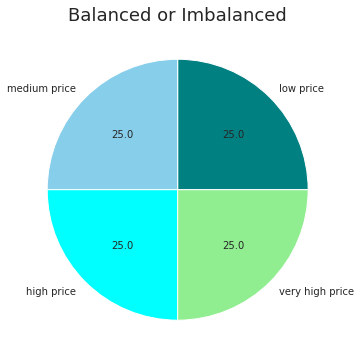

In [9]:
# Visualize the dependant variable
plt.figure(figsize=(14,6)) 
labels = ['low price','medium price','high price','very high price']
plt.pie(df['price_range'].value_counts(), labels=labels,
        colors=['teal','skyblue','aqua','lightgreen'], autopct='%1.1f')
plt.title('Balanced or Imbalanced', fontsize=18)
plt.show()

The above graph shows there are equal number of observations for each price range.

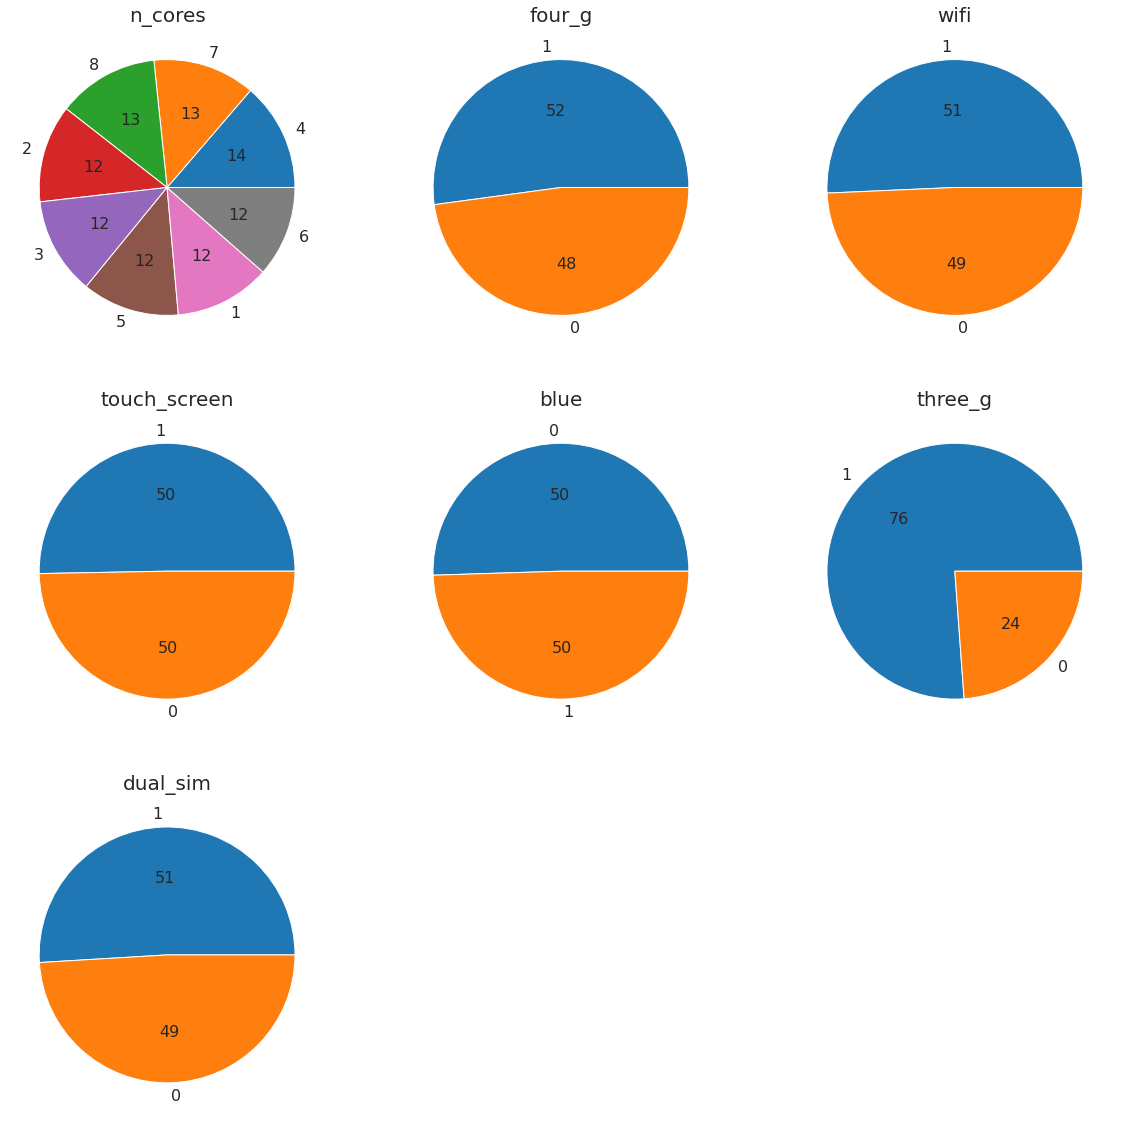

In [10]:
plt.figure(figsize=(20,20))
for i, col in enumerate(categorical):
    plt.subplot(3,3,i+1)
    df[col].value_counts().plot(kind = 'pie', fontsize=16, autopct='%.0f')
    plt.ylabel('')
    plt.title(col,fontsize=20)
    #plt.legend(loc='best',{0:'No',1:'Yes'})
plt.show()

* From the above graph we see there are almost equal number of oservations for all except three_g where 76% is one class.
* In n_cores we can see that there are almost eqaul number of observations for each core with highest observation for 4 cores

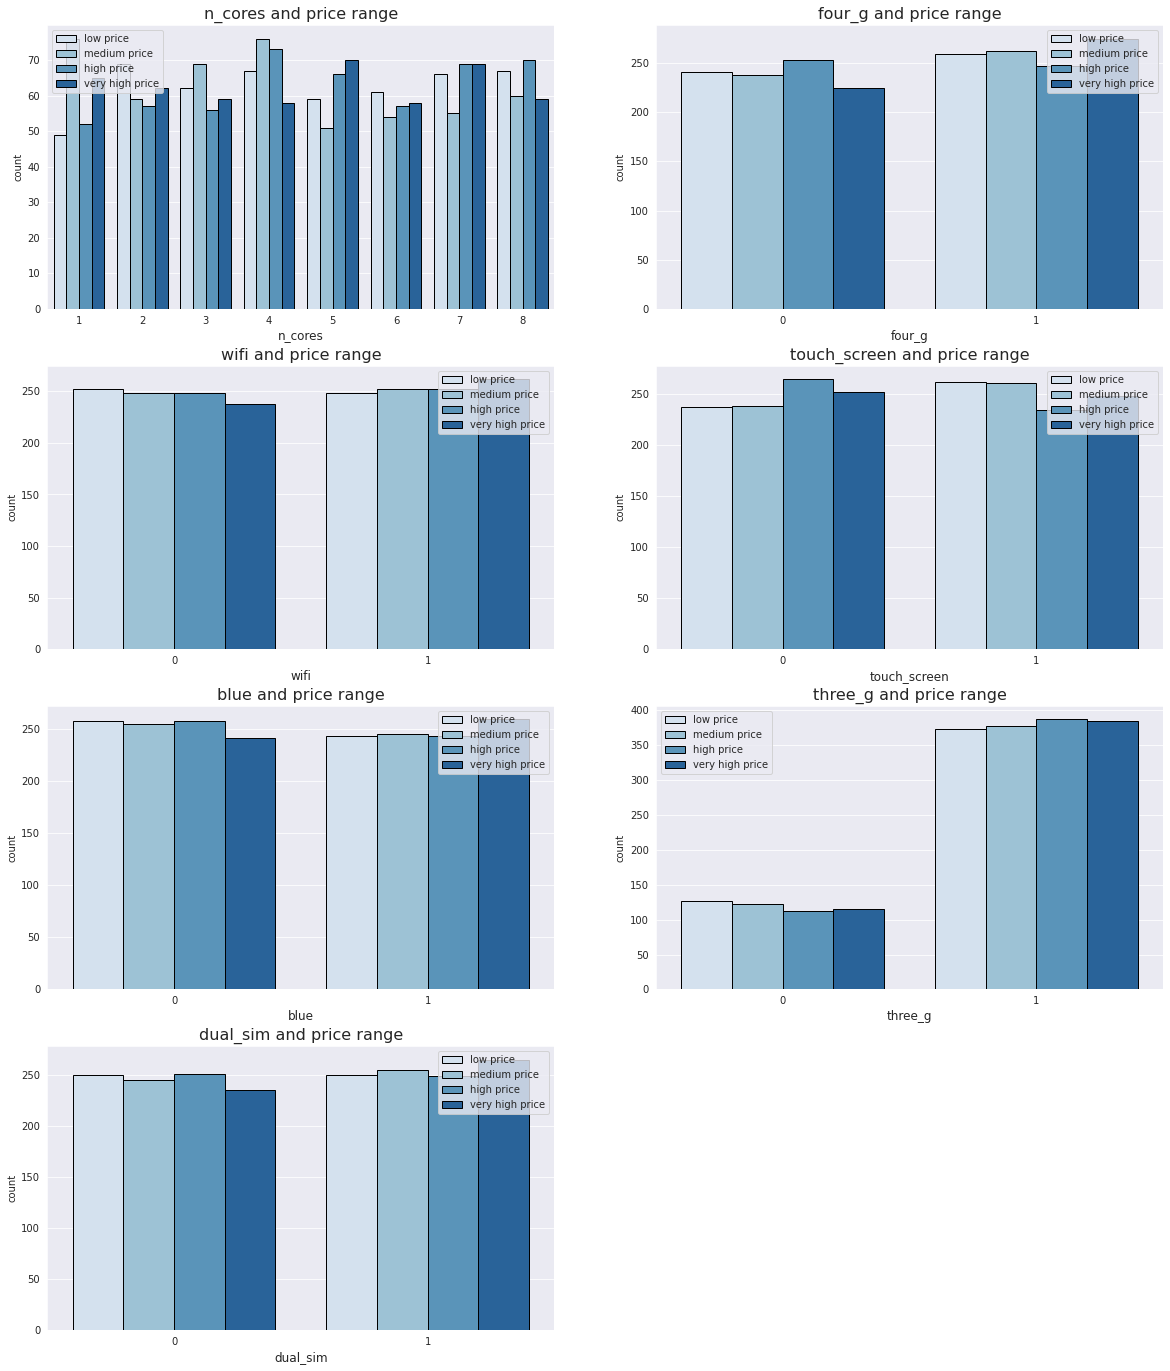

In [11]:
#columns = ['blue','three_g','four_g','wifi','touch_screen','dual_sim','n_cores']
plt.figure(figsize=(20,24))
num=1
for col in categorical:
  ax = plt.subplot(4,2,num)
  sns.countplot(df[col], hue=df['price_range'], palette='Blues',edgecolor='black')
                #edgecolor='k')
  plt.title(f'{col} and price range', fontsize=16)
  plt.xlabel(col,fontsize=12)
  plt.legend(['low price','medium price','high price','very high price'])
  num+=1
plt.tight_layout
plt.show()

#### **Conclusions**
* It's strange to see that there are almost equal number of expensive phones and cheap phones that don't support 3G. This is probably due to the fact that the dataset contains a lot of old phones.
* Whereas mobiles having 4G are more in very high price range category.
* Expensive phones tend to support dual-sim, four_g. Makes sense.
* More expensive phones have bluetooth, although the difference between price ranges are not that extreme. / This supports the claim that the dataset is pretty outdated since almost all phones these days have bluetooth.
* It's also strange that most of the phones having touch screen are also cheaper. Vice-versa, phones that don't support touch screen tend to be more expensive.
* A small linear trend is visble in wifi. Phone's that dont support wifi are cheaper and phones that support it are more expensive.

#### **clock_speed, fc, pc, sc_h, sc_w, talktime vs price_range**


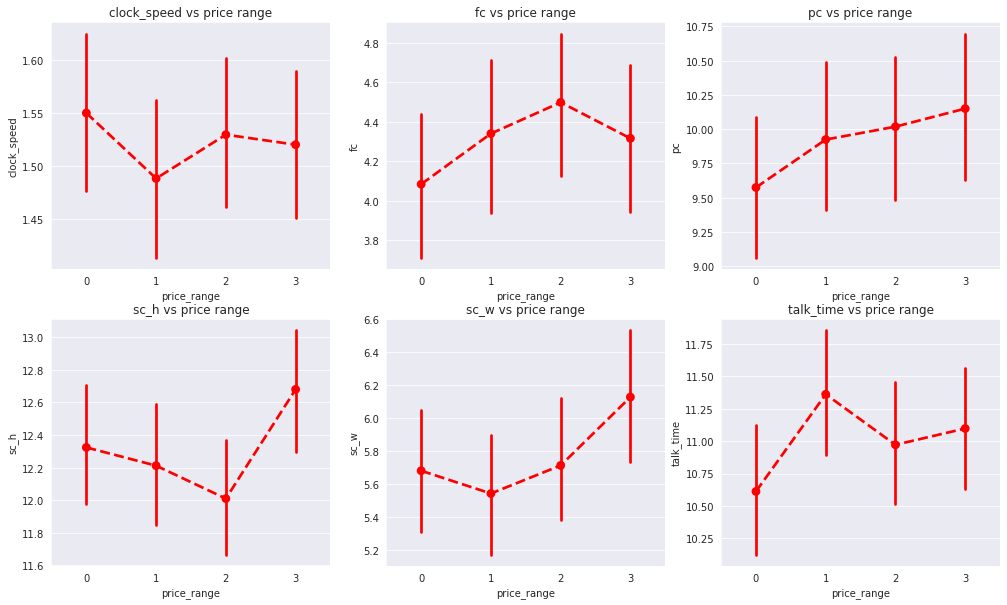

In [12]:
l1 = ['clock_speed', 'fc', 'pc', 'sc_h', 'sc_w', 'talk_time']
plt.figure(figsize=(17,10))
for index, elem in enumerate(l1):
  plt.subplot(2,3,index+1)
  sns.pointplot(x='price_range',y=elem,data=df, linestyles='--', color='red')
  plt.title(f'{elem} vs price range')

Point plot shows us the estimate of central tendency of numerical type variables with estimate error.

1. For low range price(0), the clock speed is high

2. price range is increasing with increase in front camera and primary camera megapixel.

3. screen height and width decrease initially for increase in price range but then increses.

4. talk time is higher for high range phones comparatively.

#### **price range vs internal memory, mobile weight**







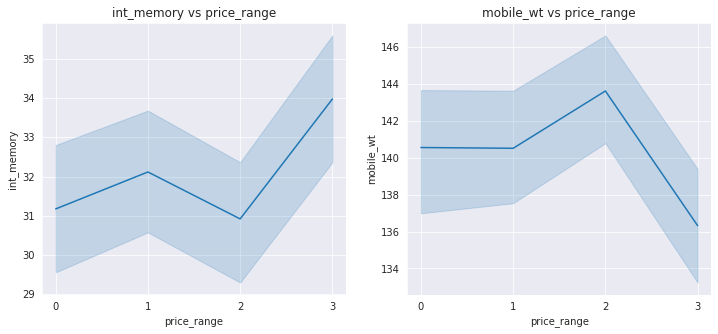

In [13]:
# visualizing price range grouped by these variables using lineplot
l1 = ['int_memory','mobile_wt']
plt.figure(figsize=(12,5))
for index, elem in enumerate(l1):
  plt.subplot(1,2,index+1)
  sns.lineplot(x='price_range', y=elem, data=df)
  plt.xticks([0,1,2,3])
  plt.title(f'{elem} vs price_range')
plt.show()

* We can observe drastic increase in internal memory for very high prices.
* Also there is a drastic decrease in mobile weight for very high prices.

#### **price range vs battery power, pixel height, pixel width, ram**

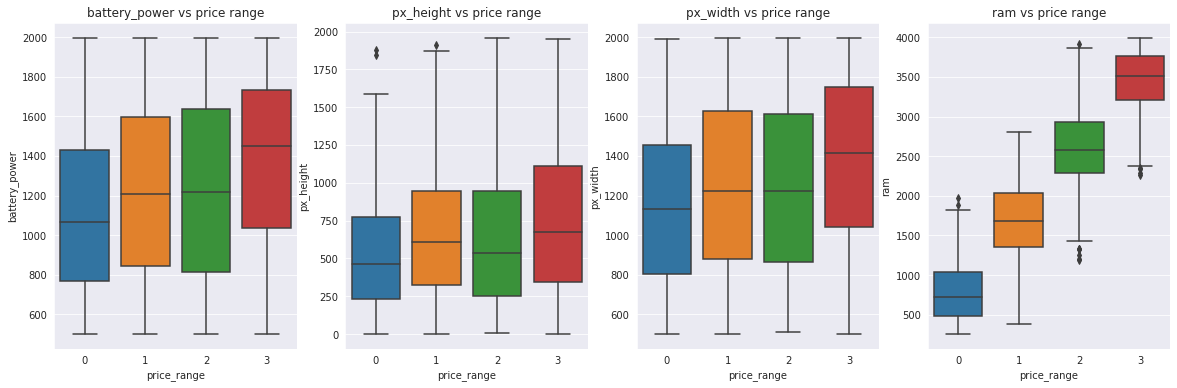

In [14]:
# visualizing price range grouped by these variables using boxplot
list1=['battery_power','px_height','px_width','ram']
plt.figure(figsize=(20,6))
for index,elem in enumerate(list1):
  plt.subplot(1,4,index+1)
  if elem == 'ram':
    sns.boxplot(x='price_range',y='ram',data=df)
  else:
    sns.boxplot(x='price_range',y=elem,data=df)
  plt.xticks([0,1,2,3])
  plt.title(f'{elem} vs price range')

Mean values of battery power, px_height, px_width, ram increases with increase in price range.

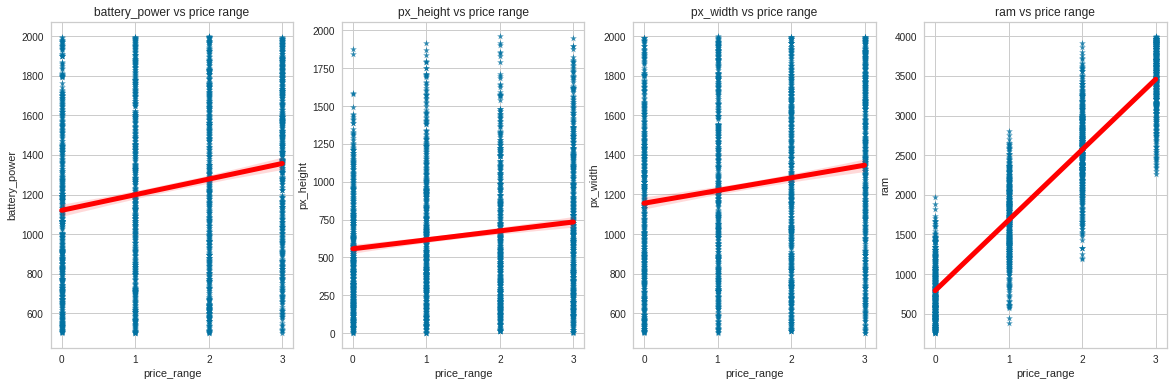

In [51]:
# visualizing price range grouped by these variables using lineplot
list1=['battery_power','px_height','px_width','ram']
plt.figure(figsize=(20,6))
for index,elem in enumerate(list1):
  xtick=[0,1,2,3]
  plt.subplot(1,4,index+1)
  plt.xticks(xtick)
  sns.regplot(x='price_range',y=elem,data=df, marker='*', 
              line_kws={'lw': 5, 'color': 'red'})
  plt.title(f'{elem} vs price range')

From the above graph we can see that all the variables are in increasing trend with increase in price range. Ram has the most direct impact.

#### **Correlation**

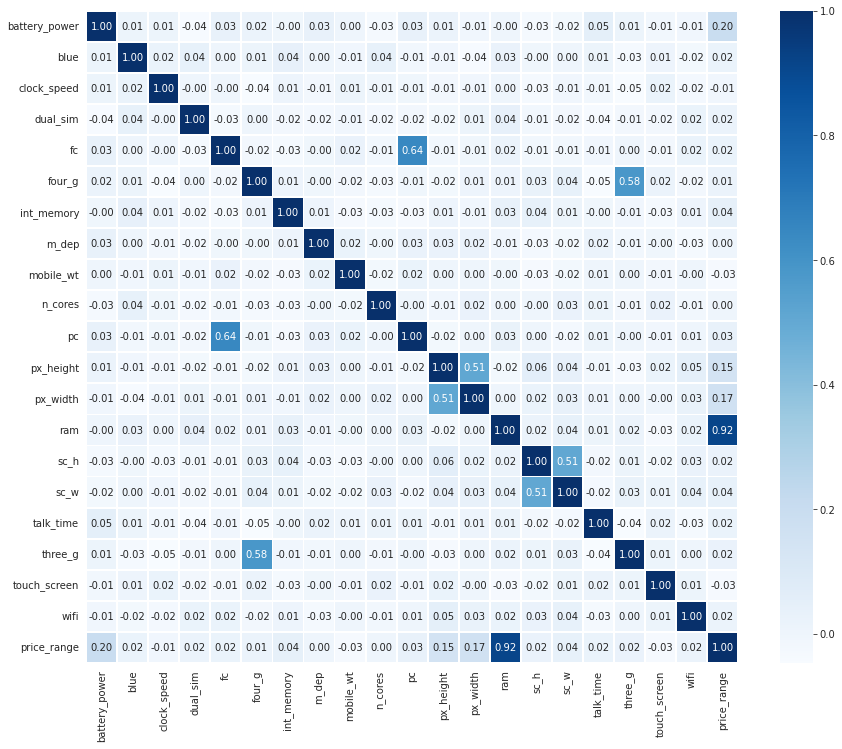

In [16]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), cmap='Blues', square=True, annot=True, fmt='.2f', linewidths=.8)
plt.show()

#### **Missing Values**

In [17]:
# checking for missing values in each column
print("The number of missing values in each variable is:\n")
print(df.isnull().sum())

The number of missing values in each variable is:

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


Great! We don't have any missing values in our dataset

In [18]:
df.duplicated().sum()

0

#### **Outliers**

In [20]:
print(numeric)

['clock_speed', 'px_width', 'sc_w', 'mobile_wt', 'battery_power', 'ram', 'talk_time', 'pc', 'sc_h', 'int_memory', 'fc', 'px_height', 'm_dep']


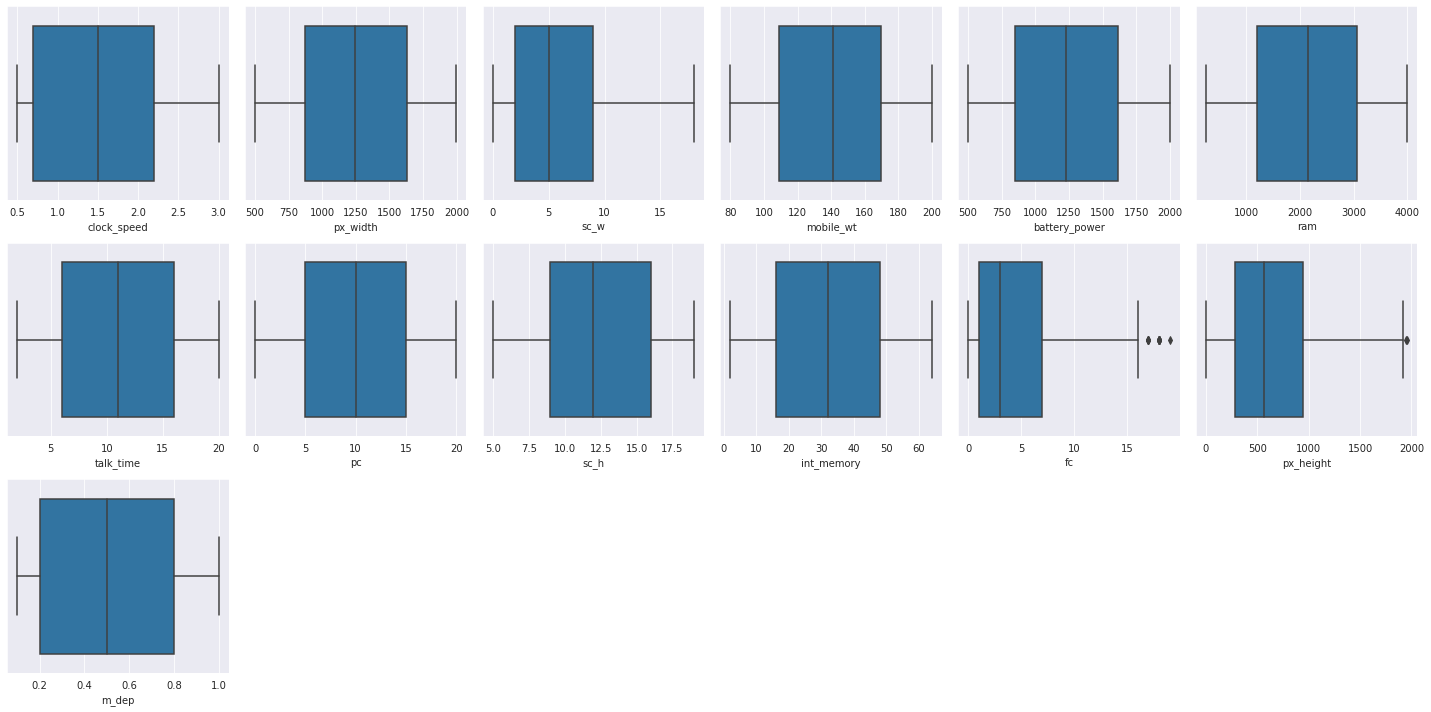

In [21]:
plt.figure(figsize=(20,10))
plotnumber = 1
for item in numeric:
  if plotnumber <= 13:
    ax = plt.subplot(3,6,plotnumber)
    sns.boxplot(df[item])
    plt.xlabel(item)
  plotnumber+=1
plt.tight_layout()

We see outliers in two of our features. Those are fc(front camera) and px_height(pixel resolution height).
But at this point i will not remove the outliers because they are negligible and it doesn't look like they are data entry errors.

#### **Feature Engineering**

In [22]:
# make a copy of dataset to make changes
df1 = df.copy()

In [23]:
# now check the rows with sc_w = 0
df1[df1['sc_w'] == 0].shape[0]

180

In [24]:
# now check the rows with px_height = 0
df1[df1['px_height'] == 0].shape[0]

2

In [25]:
# drop rows with null values
df1 = df1[df1['px_height']!=0]

In [26]:
# replace 0 with NaN values
df1['sc_w'] = df1['sc_w'].replace(0, np.nan)

In [27]:
# Using KNN Imputer to fill appropriate values in the width column
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)
df1 = pd.DataFrame(imputer.fit_transform(df1), columns=df1.columns)

In [30]:
# check missing values
df1.isnull().sum().sum()

0

In [31]:
# check the shape of data
df1.shape

(1998, 21)

In [36]:
# create screen size variable which gives us the diagonal length of the mobile
df1['screen_size'] =  ((df['sc_h']**2) + (df['sc_w']**2))**0.5

# creating single column out of 'px_height' and 'px_width'
df1['pixels'] = df1['px_height'] * df1['px_width']

Every phone that supports 4g will support 3g also. So creating a new feature as 'network' that combines 3g and 4g feature.

In [37]:
# create a network feature by adding three_g and four_g
df1['network'] = df1['four_g'] + df1['three_g']

In this new feature 'network', there will be three categories:

* 0: Supports neither of 3G or 4G
* 1: Supports 3G but not 4G
* 2: Supports both 3G and 4G

In [38]:
# dropping these columns
df1.drop(columns=['px_height','px_width','sc_h','sc_w','three_g','four_g'],axis=1, inplace=True)

In [39]:
# let's convert screen size  from cm to inches, since in real life we use inches to tell a screen size
df1['screen_size'] = round(df1['screen_size']/2.54, 2)
# Also converting RAM from Megabytes to Gigabytes, since we are more usual to Gigabytes
df1['ram'] = round(df1['ram']/1024,2)

In [40]:
df1.head()

,battery_power,blue,clock_speed,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,touch_screen,wifi,price_range,screen_size,pixels,network
0,842.0,0.0,2.2,0.0,1.0,7.0,0.6,188.0,2.0,2.0,2.49,19.0,0.0,1.0,1.0,4.49,15120.0,0.0
1,1021.0,1.0,0.5,1.0,0.0,53.0,0.7,136.0,3.0,6.0,2.57,7.0,1.0,0.0,2.0,6.80,1799140.0,2.0
2,563.0,1.0,0.5,1.0,2.0,41.0,0.9,145.0,5.0,6.0,2.54,9.0,1.0,0.0,2.0,4.40,2167308.0,2.0
3,615.0,1.0,2.5,0.0,0.0,10.0,0.8,131.0,6.0,9.0,2.70,11.0,0.0,0.0,2.0,7.04,2171776.0,1.0
4,1821.0,1.0,1.2,0.0,13.0,44.0,0.6,141.0,2.0,14.0,1.38,15.0,1.0,0.0,1.0,3.25,1464096.0,2.0


### **Train-Test Split and Standardization**
Last step one should perform before feeding the dataset to machine learning algorithms is to split the data into training and test set. The training set is used to train the model and test set acts as unseen data and is used to evaluate the model performance. Training and test set proportions may vary such as 60:40, 70:30, 75:25 but the norm is 80:20 for training and test set respectively. This is very important in order to check the performance of the model as it might do very good on the training set but perform poor on any unseen data. A model can be considered good if both the training and test performance are somewhat similar.

In [41]:
len(df1.columns)

18

In [42]:
# checking no. of independent features after modification
print('The no. of independent features after modification is: ',len(df1.drop(['price_range'], axis=1).columns.to_list()))

The no. of independent features after modification is:  17


In [43]:
# creating independent features
X = df1.drop(['price_range'], axis=1)

# creating dependent/target variable
y = df1['price_range']

In [44]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)    # random_state=0 to ensure same observations in each set everytime we run

In [46]:
# checking the shapes
print(f'The shapes of train and test set for independent variables are: X_train={X_train.shape}, X_test={X_test.shape}')
print(f'The shapes of train and test set for dependent variables are: y_train={y_train.shape}, y_test={y_test.shape}')

The shapes of train and test set for independent variables are: X_train=(1598, 17), X_test=(400, 17)
The shapes of train and test set for dependent variables are: y_train=(1598,), y_test=(400,)


Great! Now that we have splitted our data other important step one should perform, is to standardize or normalize the independent variables. This is to ensure a consistent range of values are fed into the model. Also it make the predictors mean 0 so it is easy to find the intercept. We will be using StandardScaler to standardize our data. It is the process of rescaling one or more attributes so that they have a mean value of 0 and a standard deviation of 1.

In [47]:
# before transformation
X_train.values

array([[6.330000e+02, 1.000000e+00, 2.200000e+00, ..., 4.350000e+00,
        5.337610e+05, 2.000000e+00],
       [1.113000e+03, 0.000000e+00, 6.000000e-01, ..., 4.400000e+00,
        1.373664e+06, 1.000000e+00],
       [1.994000e+03, 1.000000e+00, 8.000000e-01, ..., 5.350000e+00,
        4.742370e+05, 2.000000e+00],
       ...,
       [1.829000e+03, 1.000000e+00, 5.000000e-01, ..., 7.640000e+00,
        9.236430e+05, 2.000000e+00],
       [1.927000e+03, 0.000000e+00, 9.000000e-01, ..., 7.640000e+00,
        7.394460e+05, 0.000000e+00],
       [6.350000e+02, 1.000000e+00, 6.000000e-01, ..., 6.970000e+00,
        1.908770e+05, 2.000000e+00]])

In [52]:
# standardizing the independant variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Logistic Regression**